In [2]:
# read json file resuls/results_clean.json

import json
import numpy as np

In [3]:
def get_results(key, filename):
    results = []

    with open(filename) as f:
        data = json.load(f)

    for i in range(len(data[key])):
        results.append(data[key][i]['person'])

    aveg = {}

    for i in range(len(results)):
        for key in results[i].keys():
            if key in aveg:
                aveg[key] += results[i][key]
            else:
                aveg[key] = results[i][key]

    for key in aveg.keys():
        aveg[key] /= len(results)

    return aveg

def plot_hist(filename, title):
    # plot histograms as subplots
    
    import matplotlib.pyplot as plt
    plt.subplots(2, 2, figsize=(15, 15))
    plt.suptitle(title)

    for i, metric in enumerate(['r_mse', 'r_mae', 't_mse', 't_mae']):
        results = {}

        with open(filename) as f:
            data = json.load(f)

        for keys in data.keys():
            metric_results = get_results(keys, filename)[metric]
            results[keys] = metric_results
        
        plt.subplot(2, 2, i+1)
        plt.bar(results.keys(), results.values())
        plt.title(metric)

    plt.show()



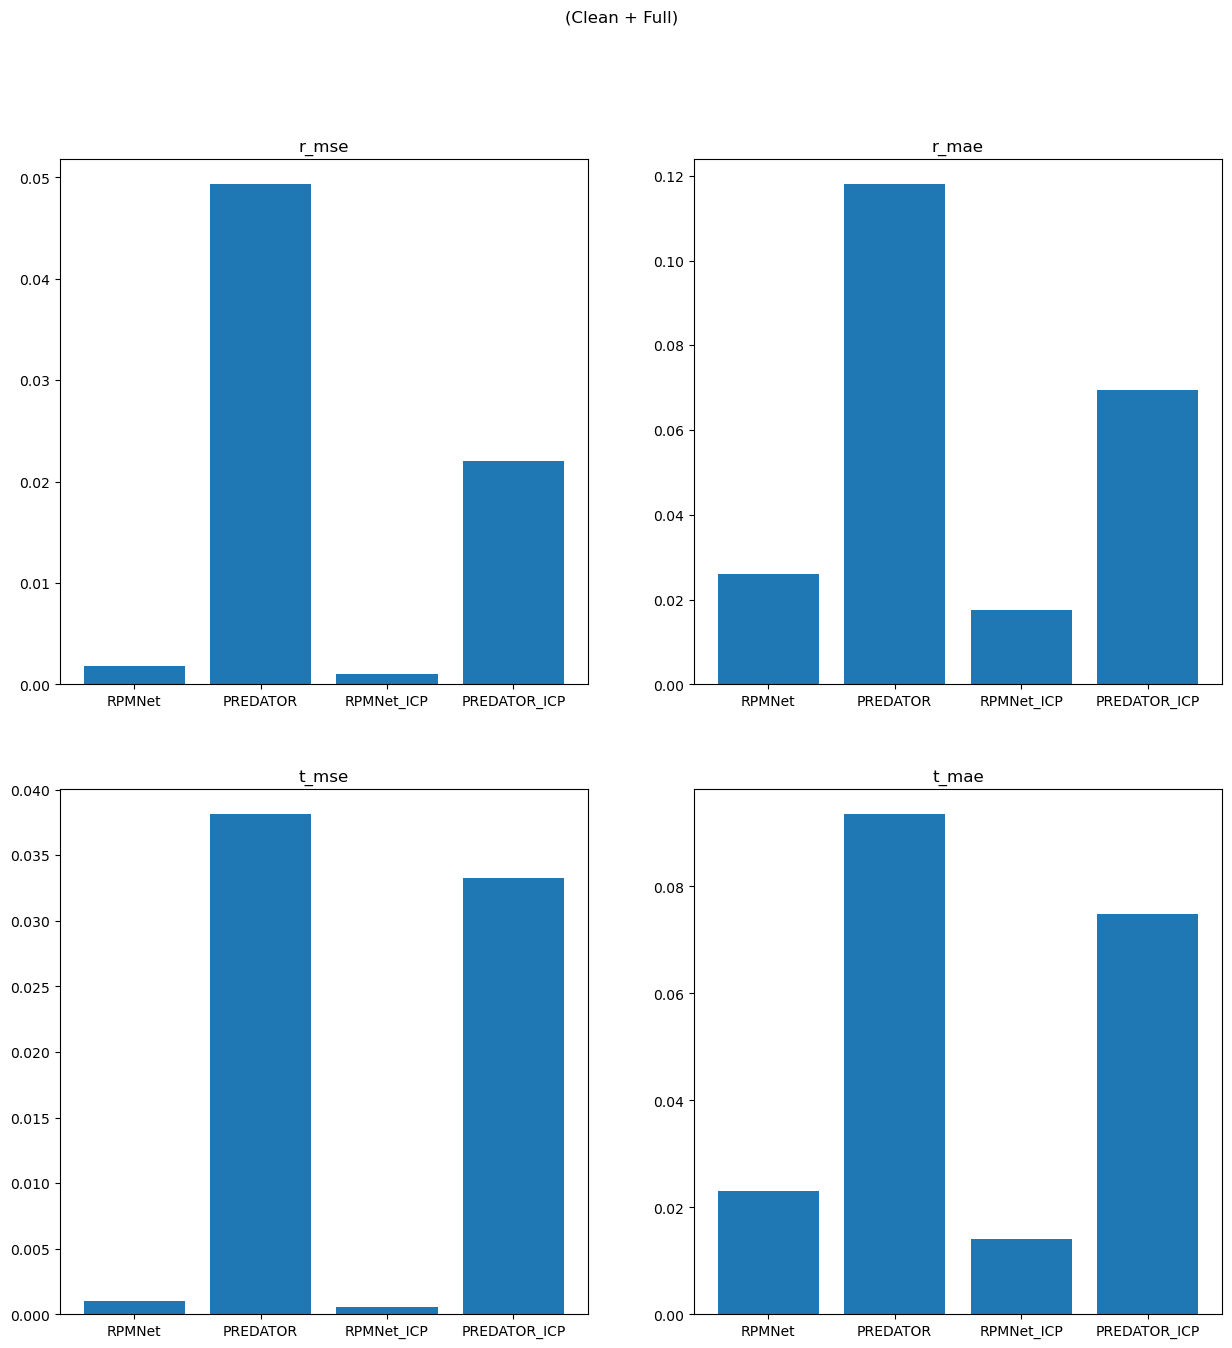

In [4]:
# create a histogram for each metric r_mse, r_mae, t_mse, t_mae comparing the results of the data keys
plot_hist('results/results_clean.json', '(Clean + Full)')

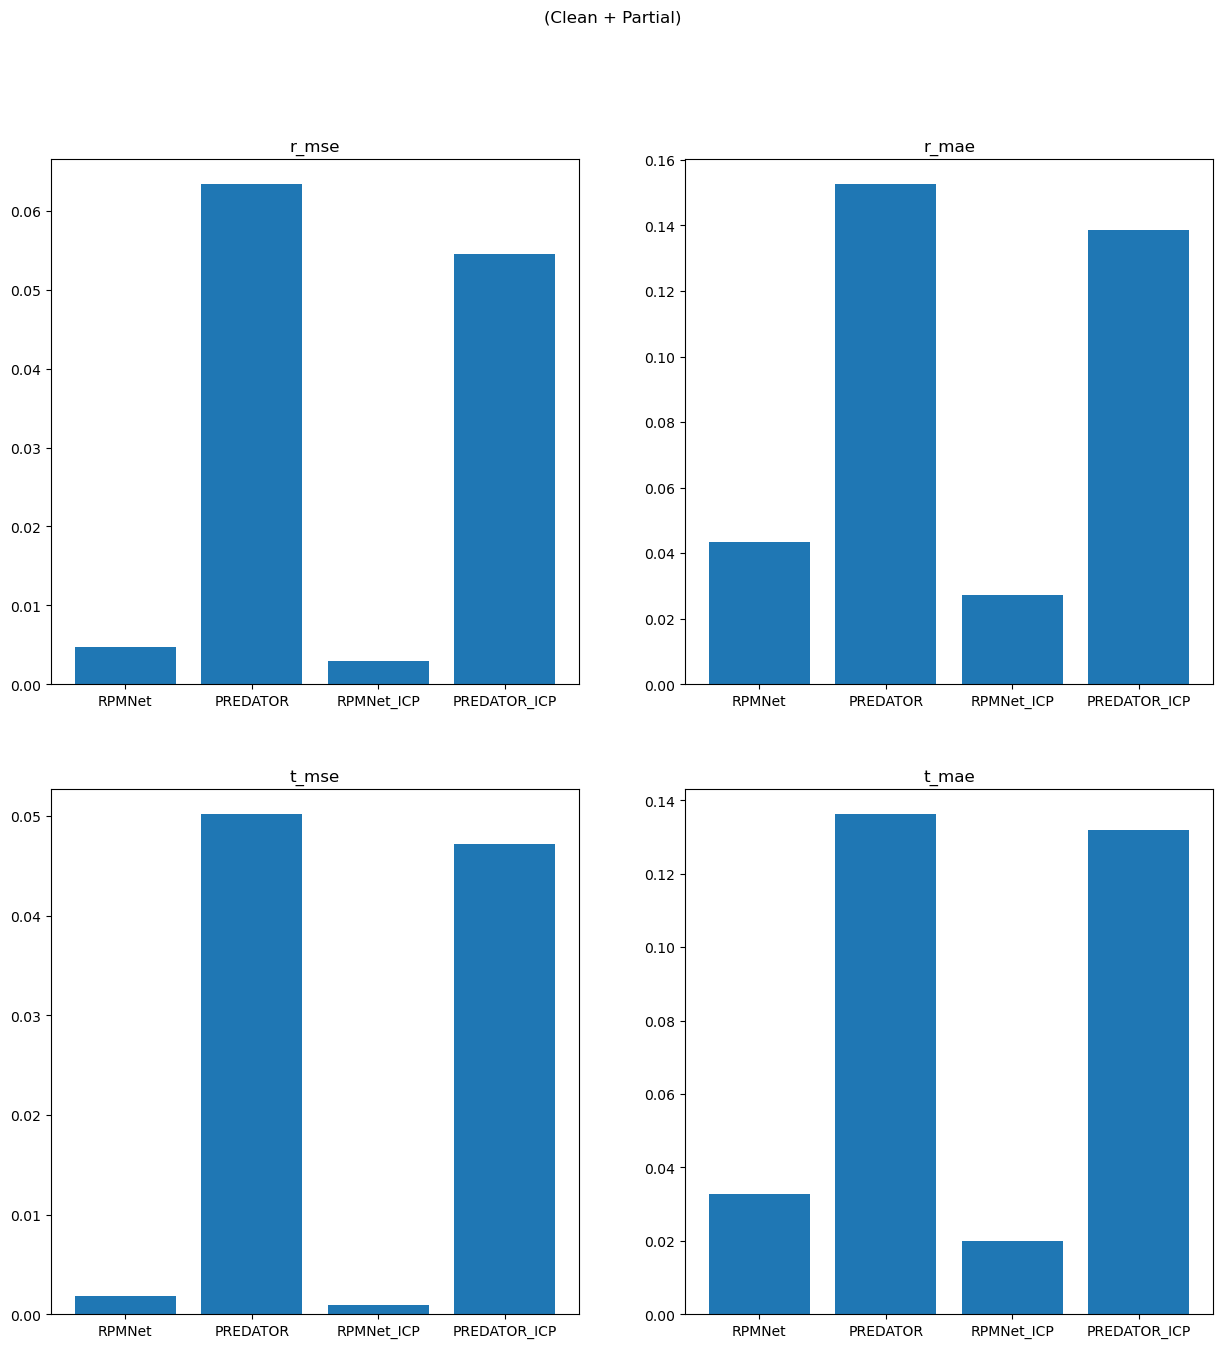

In [73]:
plot_hist('results/results_clean_partial.json', '(Clean + Partial)')

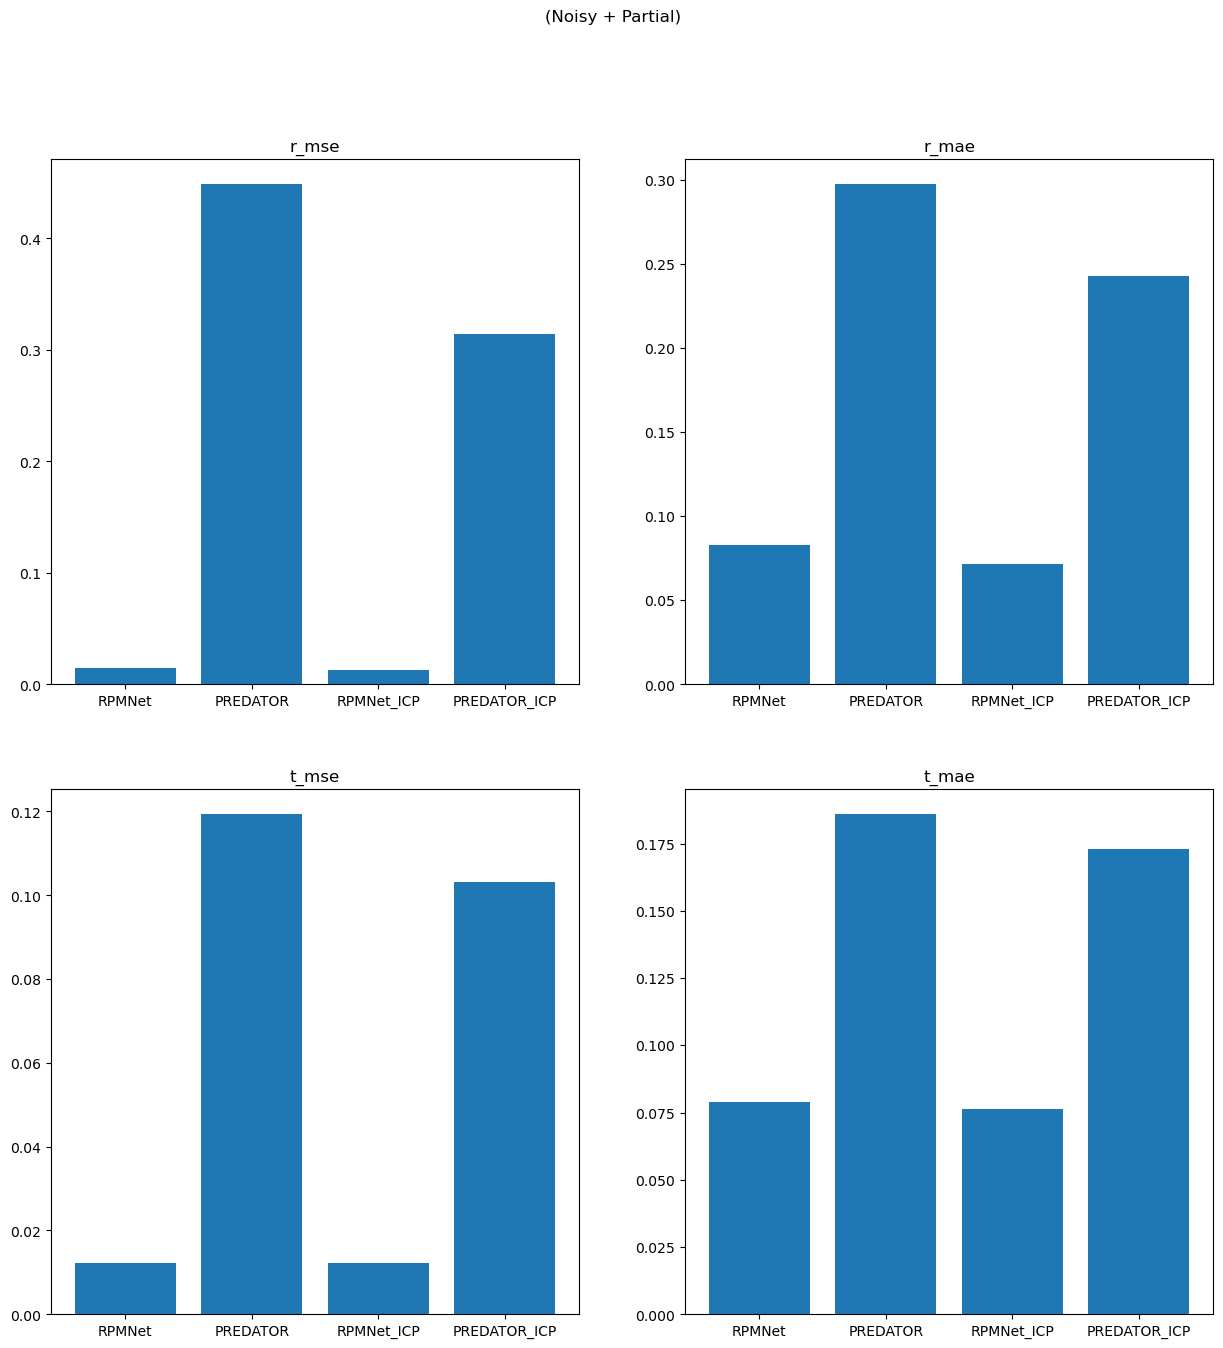

In [77]:
plot_hist('results/results_noisy_partial.json', '(Noisy + Partial)')

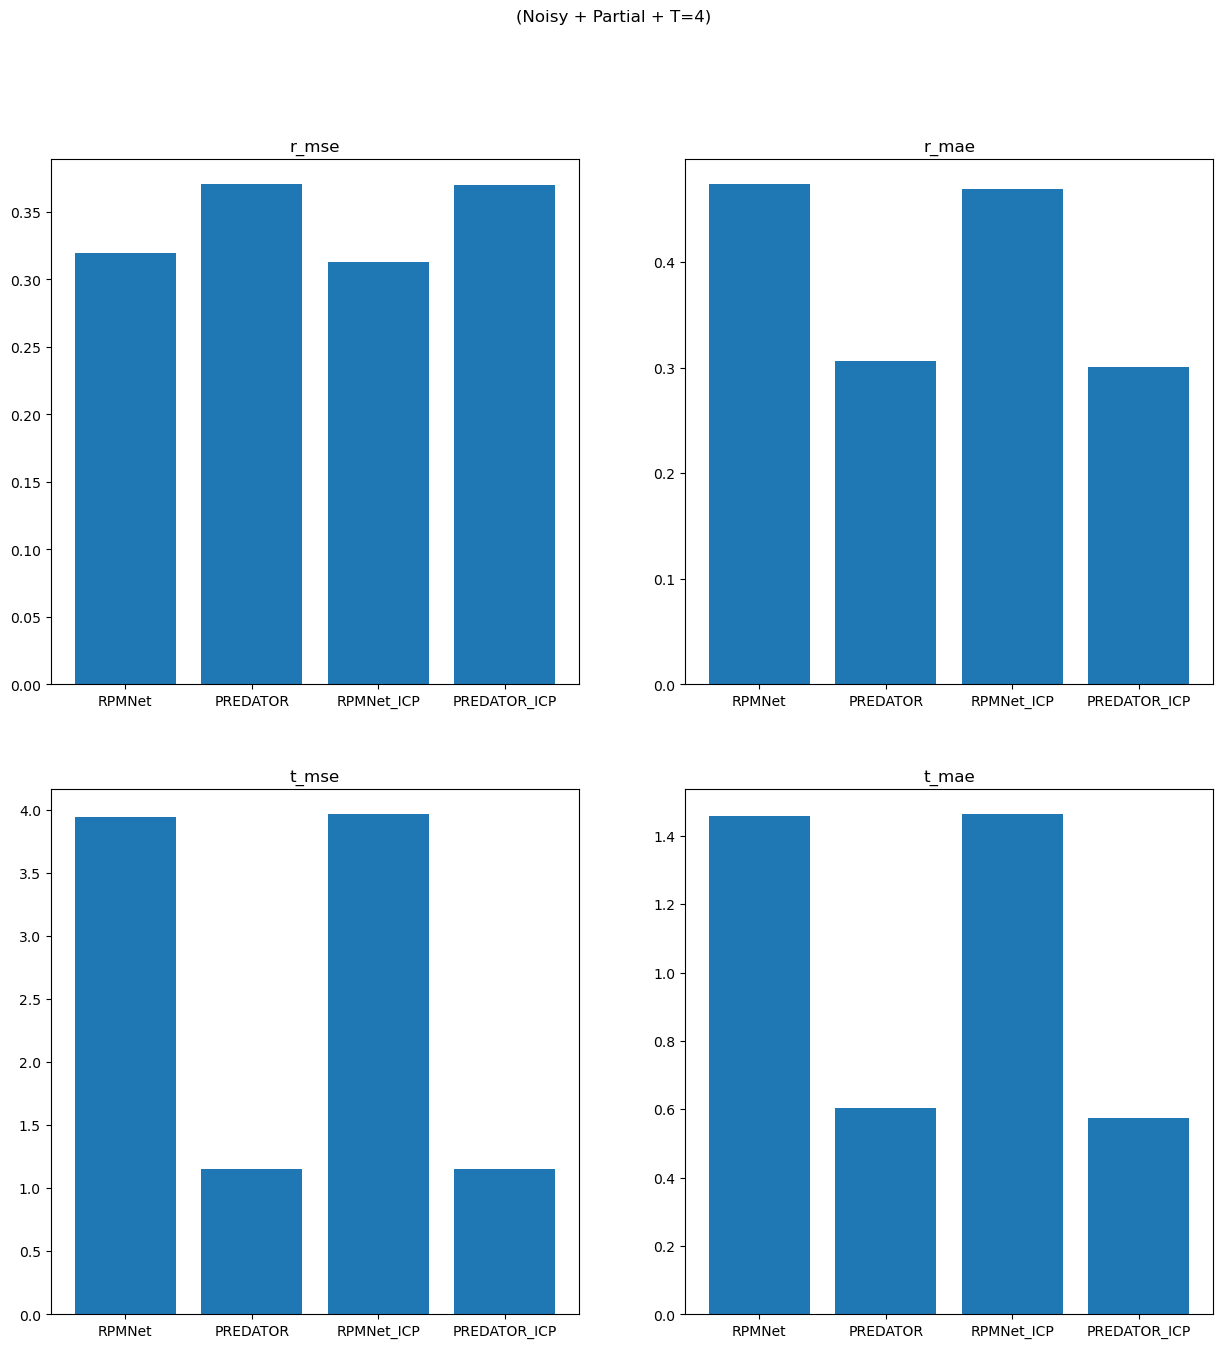

In [78]:
plot_hist('results/results_noisy_partial_t_4.json', '(Noisy + Partial + T=4)')

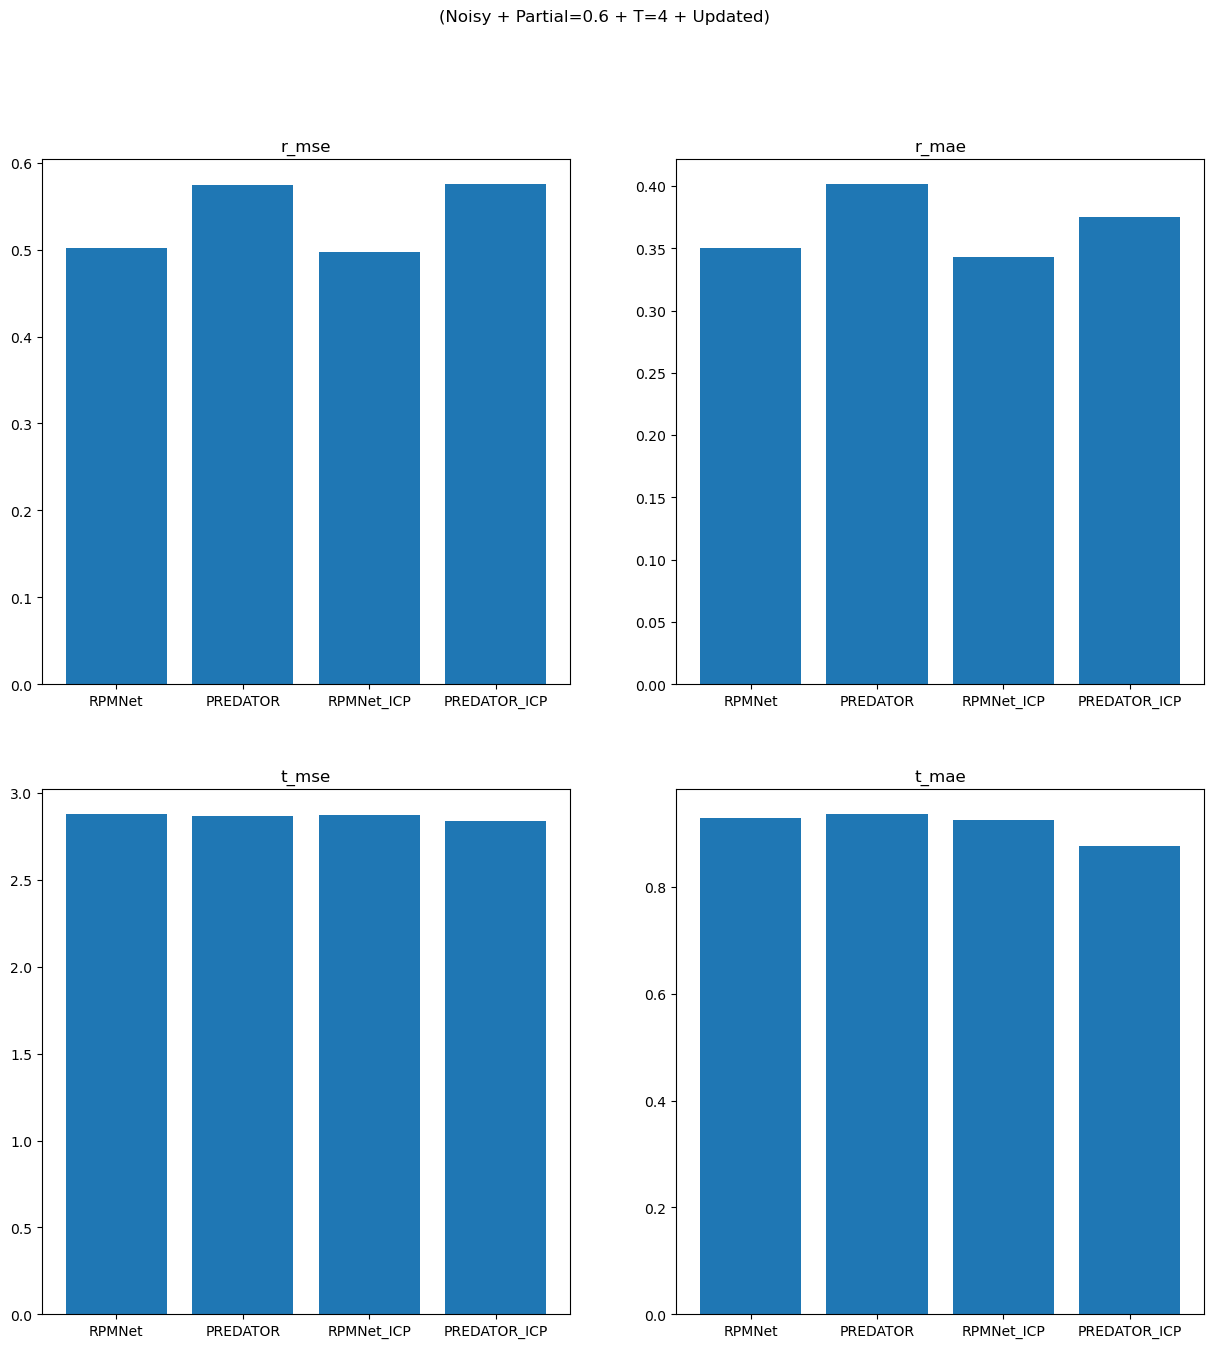

In [5]:
plot_hist('results/results_noisy_partial_t_4_updated.json', '(Noisy + Partial=0.6 + T=4 + Updated)')

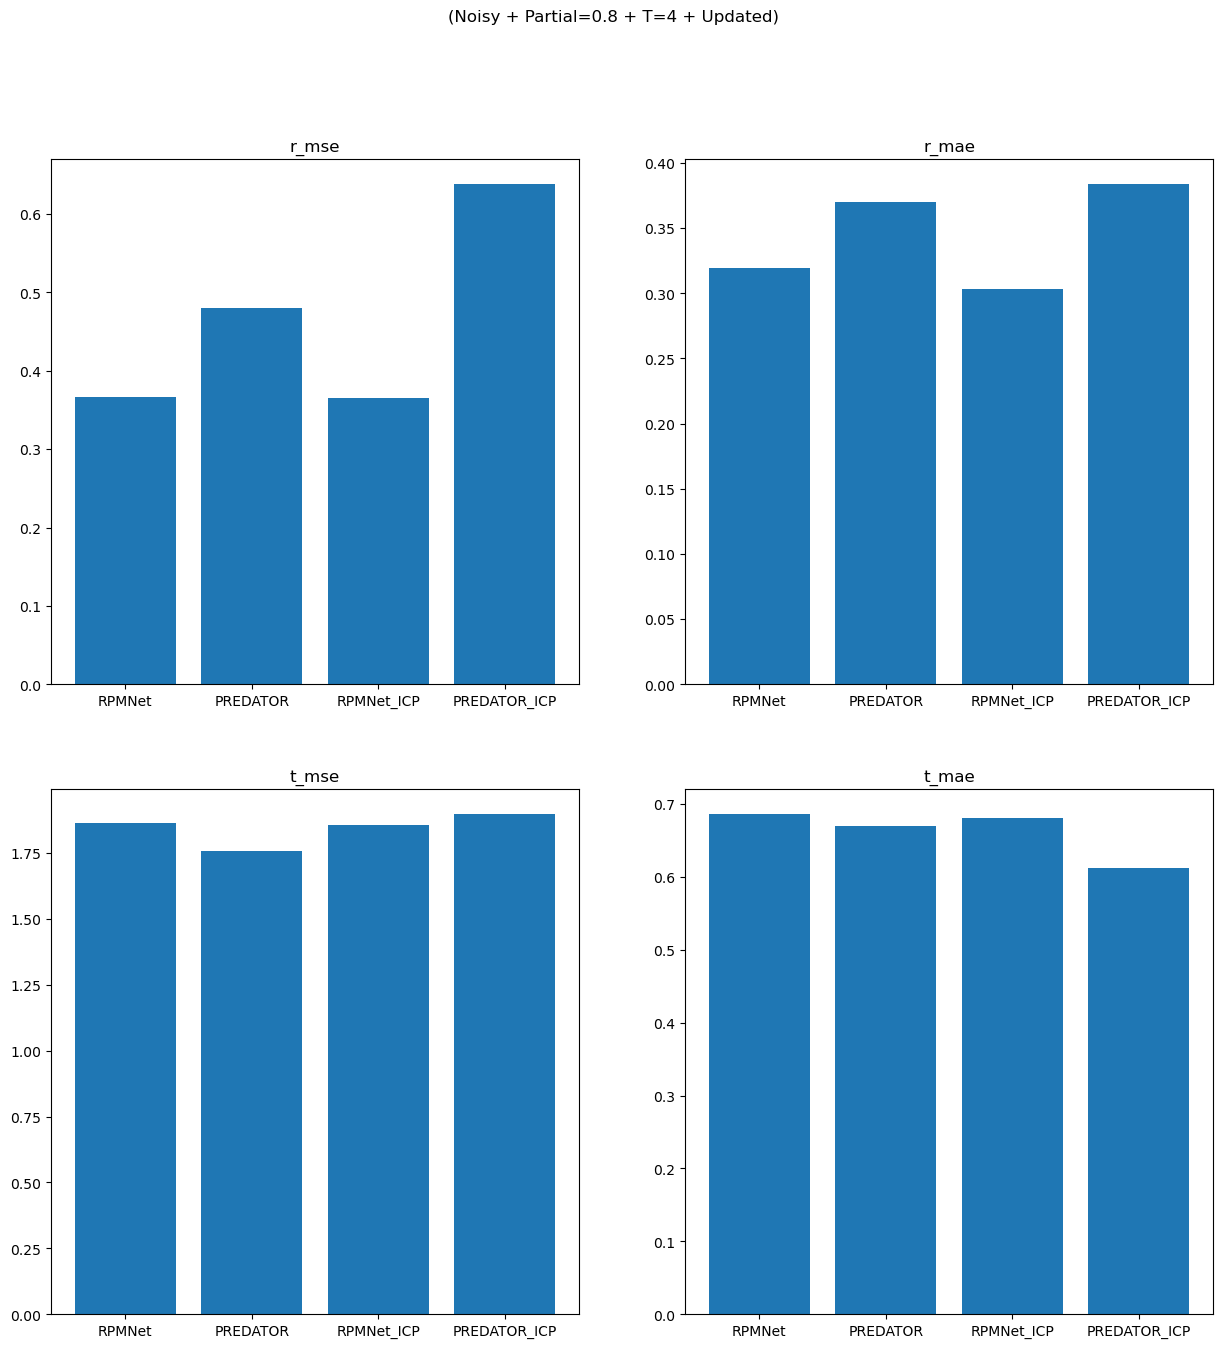

In [81]:
plot_hist('results/results_noisy_partial_0.8_t_4_updated.json', '(Noisy + Partial=0.8 + T=4 + Updated)')